# Linear Algebra Tutorial with Python

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sympy import Symbol
from sympy.vector.coordsysrect import CoordSysCartesian
from sympy import Matrix, solve_linear_system
from sympy.solvers import solve 

## Linear Transformations



Definition: takes a vector as an input and outputs a different vector
\begin{matrix}
\begin{bmatrix}
a\\
b
\end{bmatrix}
-> L(v) ->
\begin{bmatrix}
c\\
d
\end{bmatrix}
\end{matrix}

\begin{matrix}
i =
\begin{bmatrix}
0\\
1
\end{bmatrix}
j =
\begin{bmatrix}
1\\
0
\end{bmatrix}
\end{matrix}

Given a vector $\bar v$, we can see where it lands by multypling it's coordinates by $\bar i$ and $\bar j$
\begin{matrix}
\bar v =
\begin{bmatrix}
5\\
7
\end{bmatrix}
\end{matrix}

\begin{matrix}
5
\begin{bmatrix}
0\\
1
\end{bmatrix}
+7
\begin{bmatrix}
1\\
0
\end{bmatrix}
=
\begin{bmatrix}
5\\
7
\end{bmatrix}
\end{matrix}

Rotation Matrix 90 Degrees
\begin{matrix}
\begin{bmatrix}
0&-1\\
1&0
\end{bmatrix}
\end{matrix}
Let's see where vector $\bar v$ lands on our coordinate system after multiplying it by the rotation matrix
\begin{matrix}
\begin{bmatrix}
0&-1\\
1&0
\end{bmatrix}
\begin{bmatrix}
5\\
7
\end{bmatrix}
=
\begin{bmatrix}
0*5 + -1*7\\
1*5 + 0*7
\end{bmatrix}
=
\begin{bmatrix}
-7\\
5
\end{bmatrix}
\end{matrix}

\begin{matrix}
\begin{bmatrix}
a&b\\
c&d
\end{bmatrix}
\begin{bmatrix}
x\\
y
\end{bmatrix}
= x
\begin{bmatrix}
a\\
c
\end{bmatrix}
+ y
\begin{bmatrix}
b\\
d
\end{bmatrix}
=
\begin{bmatrix}
ax + by\\
cx + dy
\end{bmatrix}
\end{matrix}

[-7.00000000000000, 5.00000000000000]


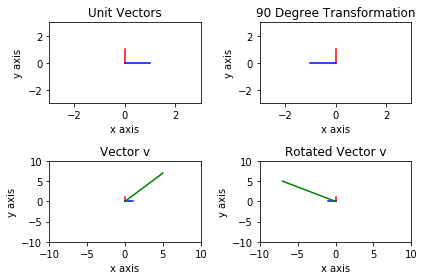

In [36]:
i = np.array([0,1])
j = np.array([1,0])
v = np.array([5,7])
rotation_matrix = Matrix([[0,-1],[1,0]])
v_transformed = rotation_matrix.dot(v)
print(v_transformed)
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1.plot([0,i[0]],[0,i[1]], color = 'r', label = 'Vector i')
ax1.plot([0,j[0]],[0,j[1]], color = 'b', label = 'Vector j')
ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_xlim(-3,3)
ax1.set_ylim(-3,3)
ax1.set_title('Unit Vectors')

ax2 = fig.add_subplot(222)
ax2.plot([0,i[0]],[0,i[1]], color = 'r', label = 'Vector i')
ax2.plot([0,-j[0]],[0,j[1]], color = 'b', label = 'Vector j')
ax2.set_xlabel('x axis')
ax2.set_ylabel('y axis')
ax2.set_xlim(-3,3)
ax2.set_ylim(-3,3)
ax2.set_title('90 Degree Transformation')

ax3 = fig.add_subplot(223)
ax3.plot([0,i[0]],[0,i[1]], color = 'r', label = 'Vector i')
ax3.plot([0,j[0]],[0,j[1]], color = 'b', label = 'Vector j')
ax3.plot([0,v[0]],[0,v[1]], color = 'g', label = 'Vector v')
ax3.set_xlabel('x axis')
ax3.set_ylabel('y axis')
ax3.set_xlim(-10,10)
ax3.set_ylim(-10,10)
ax3.set_title('Vector v')

ax4 = fig.add_subplot(224)
ax4.plot([0,i[0]],[0,i[1]], color = 'r', label = 'Vector i')
ax4.plot([0,-j[0]],[0,j[1]], color = 'b', label = 'Vector j')
ax4.plot([0,v_transformed[0]],[0,v_transformed[1]], color = 'g', label = 'Vector v')
ax4.set_xlabel('x axis')
ax4.set_ylabel('y axis')
ax4.set_xlim(-10,10)
ax4.set_ylim(-10,10)
ax4.set_title('Rotated Vector v')

plt.tight_layout()
plt.show()

## Linear Combination 

$v_1,v_2,v_3,...v_n$
$c_1v_1 + c_2v_2 + c_3v_3 + .....c_nv_n$ where c is a scaling factor

Take two vectors in $R^2$, which we will name $\bar v$ and $\bar w$
\begin{matrix}
\bar v =
\begin{bmatrix}
1\\
0
\end{bmatrix}
\bar w =
\begin{bmatrix}
0\\
1
\end{bmatrix}
\end{matrix}
$\bar v$ and $\bar w$ can form a third vector $\bar u$ by scaling the both vectors by a value and adding them together

\begin{matrix}
\bar u = a
\begin{bmatrix}
1\\
0
\end{bmatrix}
+b
\begin{bmatrix}
0\\
1
\end{bmatrix}
\end{matrix}

span(v,w) = the set of all linear combination of $a\bar v +b\bar w$

### Linear Independence

$\bar u \neq a\bar v +b\bar w$

Example: 

\begin{matrix}
\bar u = 5
\begin{bmatrix}
1\\
0
\end{bmatrix}
+ 9
\begin{bmatrix}
0\\
1
\end{bmatrix}
=
\begin{bmatrix}
5\\
9
\end{bmatrix}
\end{matrix}

### Linear Dependence

$\bar u = a\bar v +b\bar w$

Example: 

\begin{matrix}
\bar u = 4
\begin{bmatrix}
2\\
1
\end{bmatrix}
+ 6
\begin{bmatrix}
2\\
1
\end{bmatrix}
=
\begin{bmatrix}
20\\
10
\end{bmatrix}
\end{matrix}

$\bar w$ is just a scaled up version of $\bar v$
All 3 vectors lie on the same line

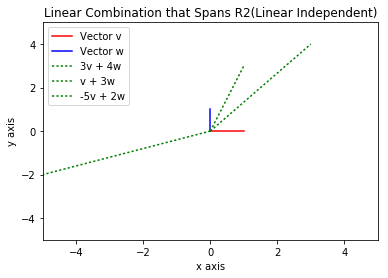

In [31]:
v = np.array([1,0]) #a = [2,1]
w = np.array([0,1])
u1 = 3*v +4*w
u2 = 1*v+3*w
u3 = -5*v+-2*w
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('Linear Combination that Spans R2(Linear Independent)')

plt.plot([0,v[0]],[0,v[1]], color = 'r', label = 'Vector v')
plt.plot([0,w[0]],[0,w[1]], color = 'b', label = 'Vector w')
plt.plot([0,u1[0]],[0,u1[1]], color = 'g', label = '3v + 4w', linestyle='dotted')
plt.plot([0,u2[0]],[0,u2[1]], color = 'g', label = 'v + 3w', linestyle='dotted')
plt.plot([0,u3[0]],[0,u3[1]], color = 'g', label = '-5v + 2w', linestyle='dotted')

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()
plt.show()

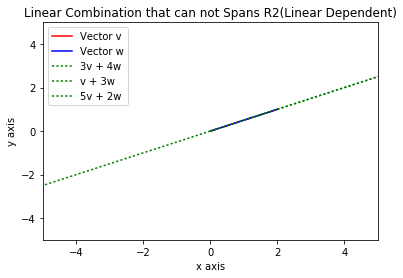

In [32]:
v = np.array([2,1]) #a = [2,1]
w = np.array([2,1])
u1 = 3*v +4*w
u2 = 1*v+3*w
u3 = -5*v+-2*w
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('Linear Combination that can not Spans R2(Linear Dependent)')

plt.plot([0,v[0]],[0,v[1]], color = 'r', label = 'Vector v')
plt.plot([0,w[0]],[0,w[1]], color = 'b', label = 'Vector w')
plt.plot([0,u1[0]],[0,u1[1]], color = 'g', label = '3v + 4w', linestyle='dotted')
plt.plot([0,u2[0]],[0,u2[1]], color = 'g', label = 'v + 3w', linestyle='dotted')
plt.plot([0,u3[0]],[0,u3[1]], color = 'g', label = '5v + 2w', linestyle='dotted')

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()
plt.show()

## Basis 
The basis of a vector space is the set of the linearly independent vectors that span the full space

In $R^2$, the following vectors form a basis, The set will no longer be a basis if any additional vector are added to the set :
\begin{matrix}
\bar v =
\begin{bmatrix}
1\\
0
\end{bmatrix}
\bar w =
\begin{bmatrix}
0\\
1
\end{bmatrix}
\end{matrix}

## 3D Space

Three linearly independent unit vectors form the basis of R3


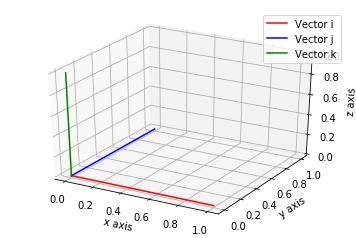

In [30]:
v1 = np.array([1,0,0])
v2 = np.array([0,1,0])
v3 = np.cross(v1,v2)
fig1 = plt.figure()
ax2 = fig1.add_subplot(111, projection='3d')

ax2.plot([0,v1[0]],[0,v1[1]],[0,v1[2]], color = 'r', label = 'Vector i')
ax2.plot([0,v2[0]],[0,v2[1]],[0,v2[2]], color = 'b', label = 'Vector j')
ax2.plot([0,v3[0]],[0,v3[1]],[0,v3[2]], color = 'g', label = 'Vector k')

ax2.set_xlabel('x axis')
ax2.set_ylabel('y axis')
ax2.set_zlabel('z axis')
plt.legend()
print("Three linearly independent unit vectors form the basis of R3")
plt.show()